<h4>Neutron diffusion equation of a reactor core without reflector</h4>
<h4 >1. Equation : </h4>

<h4>$ -D\triangle\phi(x,y,z) + \Sigma_a\phi(x,y,z) = \frac{1}{k}\nu\Sigma_f\phi(x,y,z) $　</h4>

$ D :$拡散係数\
$\phi(x,y,z) :$中性子束\
$\Sigma_a :$中性子吸収断面積\
$k :$実効増倍率\
$\Sigma_f :$核分裂断面積\
$\nu :$中性子増倍率
<h4 >2. Analytical solution : </h4>

<h4>1)first, transform the equation to:</h4>
<h4> $\Delta\phi(x,y,z) + B^2\phi(x,y,z) = 0\hspace{2mm}, \hspace{12mm} B^2 = \frac{\frac{\nu\Sigma_f}{k}-\Sigma_a}{D}$</h4>
<h4>2)Secondly, using variable separation to break the equation down to three seperated equations corresponding to x, y and z axis</h4>
<h4>$ \phi_x = \phi_1 \mathrm{cos}(B_1x)\hspace{2mm}, $</h4>
<h4>$ \phi_y = \phi_2 \mathrm{cos}(B_2y)\hspace{2mm}, $</h4>
<h4>$ \phi_z = \phi_3 \mathrm{cos}(B_3z)\hspace{2mm}, $</h4>
<h4>$\phi_1\phi_2\phi_3 = \phi_0\hspace{2mm}, B_1^2+B_2^2+B_3^2 = B^ 2$</h4>

<h4>3)Finally, multiplying the equations for the three directions to obtain the final solution </h4>
<h4>$ \phi(x,y,z) = \phi_0 \mathrm{cos}(B_1x)\mathrm{cos}(B_2x)\mathrm{cos}(B_3x) $</h4>
<h4> Applying the boundary condition leads to:</h4>
<h4>$ B_1 = \frac{\pi}{a}, B_2 = \frac{\pi}{b}, B_3 = \frac{\pi}{c}   $</h4>

In [106]:
# D = 0.05
#s igma_a = 1.0e-25
# sigma_f = 1.0e-26
# k=1
v=2.5
phi_0 = 10
a = 5
b = 5
c= 5

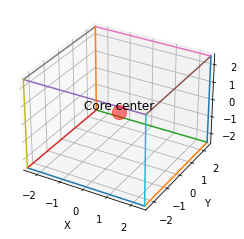

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 直方体の頂点座標
vertices = [
    (-a/2, -b/2, -c/2), (a/2, -b/2, -c/2), (a/2, b/2, -c/2), (-a/2, b/2, -c/2),  # Bottom face
    (-a/2, -b/2, c/2), (a/2, -b/2, c/2), (a/2, b/2, c/2), (-a/2, b/2, c/2)   # Top face
]

# 面を構成する頂点のインデックス
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    x = [vertices[edge[0]][0], vertices[edge[1]][0]]
    y = [vertices[edge[0]][1], vertices[edge[1]][1]]
    z = [vertices[edge[0]][2], vertices[edge[1]][2]]
    ax.plot(x, y, z)

# 中軸のプロット
ax.scatter([0],[0],[0], s=200, c="r", alpha=0.5)
ax.text(0,0,0,"Core center", fontsize=12, ha='center', va='bottom')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-a/2, a/2)
ax.set_ylim(-b/2, b/2)
ax.set_zlim(-c/2, c/2)

plt.show()



<h4>$ \phi_0 = 1\hspace{2mm}, a =5, b =5, c=5,  $</h4>
<h4>$ k = 1 $(臨界)</h4>
<h4>$ \nu = 2.5 $</h4>

<h4 >2. Analytical solution : </h4>

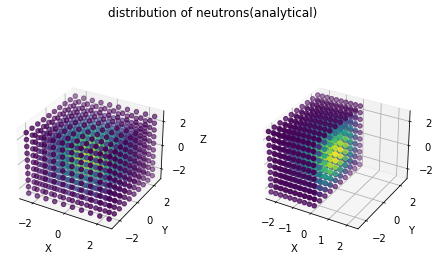

In [108]:
# analytical solution
# define function phi
def phi(x, y, z, a, b, c, phi_0):
    B1 = 3.1415926 / a
    B2 = 3.1415926 / b
    B3 = 3.1415926 / c
    return phi_0 * np.cos(B1 * x) * np.cos(B2 * y) * np.cos(B3 * z)

x = np.linspace(-a / 2, a / 2, 10)
y = np.linspace(-b / 2, b / 2, 10)
z = np.linspace(-c / 2, c / 2, 10)
x, y, z = np.meshgrid(x, y, z)

Phi = phi(x, y, z, a, b, c, phi_0)

fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c=Phi, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
fig.suptitle('distribution of neutrons(analytical)')

x = np.linspace(-a / 2, 0, 10)
y = np.linspace(-b / 2, b / 2, 10)
z = np.linspace(-c / 2, c / 2, 10)
x, y, z = np.meshgrid(x, y, z)
Phi = phi(x, y, z, a, b, c, phi_0)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c=Phi, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-2.5, 2.5]) 

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()


<h4> Compose simulation methods</h4>
<h3> $\frac{\mathrm{d}^2\phi_x}{\mathrm{d}x^2} + B_1^2\phi_x = 0\hspace{2mm}, B_1 = \frac{\pi}{a}$</h3>
<h4>Euler's method:</h4>

<h3>$\frac{\phi_{n+1}-\phi_n}{\Delta x} = \theta_n, \hspace{6mm} \frac{\theta_{n+1}-\theta_n}{\Delta x} = -B^2\phi_n,  $</h3>
<h3>$\theta_{n+1} = \theta_n - \Delta xB^2\phi_n$</h3>
<h3>$\theta_n \Delta x +\phi_n = \phi_{n+1} $ </h3>
<h4>Boundary conditions:</h4>
Due to the symmetry, neutrons diffuse equally in both left and right directions. As a result, the neutron flux at the origin is zero, which leads to the boundary condition above.
<h3>$ J(a/2) = \frac{\mathrm{d}\phi}{\mathrm{d}x}|_{x = a/2} = 0$ </h3>

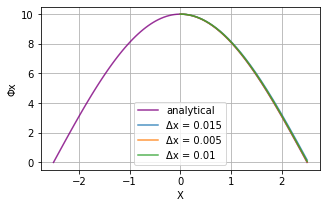

In [127]:

B1 = 3.1415926 / a
# simulation
deltax = 0.015
lenth = int((a/2)/deltax)
x1 = np.linspace(0, a / 2, lenth)
phi_1 = [phi_0]
theta_1 = [0]

for i in range(lenth):
    theta_1.append(theta_1[i]-deltax*(B1)**2*phi_1[i])
    phi_1.append(theta_1[i]*deltax+phi_1[i])


# simulation
deltax = 0.005
lenth = int((a/2)/deltax)
x2 = np.linspace(0, a / 2, lenth)
phi_2 = [phi_0]
theta_2 = [0]

for i in range(lenth):
    theta_2.append(theta_2[i]-deltax*(B1)**2*phi_2[i])
    phi_2.append(theta_2[i]*deltax+phi_2[i])
    
deltax = 0.01
lenth = int((a/2)/deltax)
x3 = np.linspace(0, a / 2, lenth)
phi_3 = [phi_0]
theta_3 = [0]

for i in range(lenth):
    theta_3.append(theta_3[i]-deltax*phi_3[i]*(B1)**2)
    phi_3.append(theta_3[i]*deltax+phi_3[i])    
    

# analytical solution corresponding to x axis
x =np.linspace(-a/2, a / 2, 100)
phi_x_analytical = phi_0 * np.cos(B1*x)
plt.figure(figsize=(5,3))
plt.plot(x, phi_x_analytical, c ="purple", alpha=0.8, label="analytical")
plt.plot(x1, phi_1[:166],  alpha=0.8, label="Δx = 0.015")
plt.plot(x2, phi_2[:500],  alpha=0.8, label="Δx = 0.005")
plt.plot(x3, phi_3[:250],  alpha=0.8, label="Δx = 0.01")
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φx")
plt.legend()
plt.show()

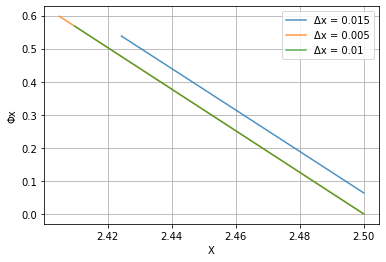

In [110]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(x1[-6:], phi_1[-6:],  alpha=0.8, label="Δx = 0.015")
ax3.plot(x2[-20:], phi_2[-20:],  alpha=0.8, label="Δx = 0.005")
ax3.plot(x3[-10:], phi_3[-10:],  alpha=0.8, label="Δx = 0.01")
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φx")
plt
plt.legend()
plt.show()

In [111]:
import tensorflow as tf
from tensorflow import keras
def MLP(n_input, n_output, n_neuron, n_layer, act_fn='tanh'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=n_neuron,
            activation=act_fn,
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            input_shape=(n_input,),
            name='H1')
    ])
    for i in range(n_layer-1):
        model.add(
            tf.keras.layers.Dense(
                units=n_neuron,
                activation=act_fn,
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
                name='H{}'.format(str(i+2))
            ))
    model.add(
        tf.keras.layers.Dense(
            units=n_output,
            name='output'
        ))
    return model

In [112]:
class EarlyStopping:

    def __init__(self, patience=10, verbose=0):
        self.epoch = 0
        self.pre_loss = float('inf')
        self.patience = patience 
        self.verbose = verbose

    def __call__(self, current_loss):
        if self.pre_loss < current_loss:
            self.epoch += 1

            if self.epoch > self.patience: 
                if self.verbose: 
                    print('early stopping')
                return True

        else: 
            self.epoch = 0
            self.pre_loss = current_loss

        return False

In [135]:
class PhysicsInformedNNs():

    def __init__(self, n_input, n_output, n_neuron, n_layer, epochs,act_fn='tanh'):
        self.n_input = n_input
        self.n_output = n_output
        self.n_neuron = n_neuron
        self.n_layer = n_layer
        self.epochs = epochs
        self.act_fn = act_fn
        self.model_loc = []

    def build(self, optimizer, loss_fn, early_stopping):
        self._model = MLP(self.n_input, self.n_output, self.n_neuron, self.n_layer, self.act_fn)
        self._optimizer = optimizer
        self._loss_fn = loss_fn
        self._early_stopping = early_stopping
        return self

    def train_step(self, x_data, p_data, x_pinn, B, loop):
        with tf.GradientTape() as tape_total:
            tape_total.watch(self._model.trainable_variables)
            p_pred = self._model(x_data)
            loss1 = self._loss_fn(p_pred, p_data)
            loss1 = tf.cast(loss1, dtype=tf.float32)
            

            with tf.GradientTape() as tape2:
                tape2.watch(x_pinn)
                with tf.GradientTape() as tape1:
                    tape1.watch(x_pinn)
                    p_pred_pinn = self._model(x_pinn)
                dp_dx = tape1.gradient(p_pred_pinn, x_pinn)
            dp_dx2 = tape2.gradient(dp_dx, x_pinn)

            dp_dx2 = tf.cast(dp_dx2, dtype=tf.float32)
            p_pred_pinn = tf.cast(p_pred_pinn, dtype=tf.float32)

            loss_physics = dp_dx2 +  B**2 * p_pred_pinn
            loss2 = self._loss_fn(loss_physics, tf.zeros_like(loss_physics))
            loss2 = tf.cast(loss2, dtype=tf.float32)

            loss = loss1 + loss2

        self._optimizer.minimize(loss, self._model.trainable_variables, tape=tape_total)
        self._loss_values.append(loss)
        if loop % 50 == 0:
            print("train_step :", self.loop,"loss1 :", loss1.numpy(), "loss2 :", loss2.numpy(), "loss :", loss.numpy())
        return self

    def train(self, x,  x_data, p_data, x_pinn, B):
        self.loop = 0
        self._loss_values = []
        for i in range(self.epochs):
            self.loop += 1
            self.train_step(x_data, p_data, x_pinn, B, self.loop)
            if self.loop % 500 == 0:
                model_clone = tf.keras.models.clone_model(self._model)
                model_clone.set_weights(self._model.get_weights())
                self.model_loc.append(model_clone)
            if self._early_stopping(self._loss_values[-1]):
                break
        

In [136]:
    # define and train a PINNs
x_pinn = tf.linspace(-a/2,a/2,50)
x_pinn = tf.reshape(x_pinn,[-1,1])

# boundary condition
x =tf.Variable([[-a/2],[0],[a/2]], dtype=tf.float64)
p = tf.Variable([[0],[phi_0],[0]], dtype=tf.float64)

boundary_points = [0,1,2]

x_data = tf.gather(x, boundary_points )
p_data = tf.gather(p, boundary_points )


In [137]:
x = tf.linspace(-a/2, a/2, 300)
PINNs = PhysicsInformedNNs(1,1,56,2,25000)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
loss_fn = tf.keras.losses.MeanSquaredError()
early_stopping = EarlyStopping(patience=50,verbose=1)
PINNs.build(optimizer, loss_fn, early_stopping)
PINNs.train(x, x_data, p_data, x_pinn, B1)

train_step : 50 loss1 : 28.929636 loss2 : 0.050875798 loss : 28.980513
train_step : 100 loss1 : 18.75252 loss2 : 0.67780167 loss : 19.43032
train_step : 150 loss1 : 7.9584866 loss2 : 2.5775876 loss : 10.536074
train_step : 200 loss1 : 4.305734 loss2 : 4.0947127 loss : 8.400447
train_step : 250 loss1 : 3.9344263 loss2 : 4.105136 loss : 8.039562
train_step : 300 loss1 : 3.7608387 loss2 : 4.028551 loss : 7.7893896
train_step : 350 loss1 : 3.6250577 loss2 : 3.9644926 loss : 7.58955
train_step : 400 loss1 : 3.5101495 loss2 : 3.9004896 loss : 7.410639
train_step : 450 loss1 : 3.4021134 loss2 : 3.8332162 loss : 7.2353296
train_step : 500 loss1 : 3.2966788 loss2 : 3.7588494 loss : 7.055528
train_step : 550 loss1 : 3.1932282 loss2 : 3.6739712 loss : 6.8671994
train_step : 600 loss1 : 3.0905704 loss2 : 3.5749402 loss : 6.6655107
train_step : 650 loss1 : 2.9859123 loss2 : 3.4583552 loss : 6.4442673
train_step : 700 loss1 : 2.8750403 loss2 : 3.3214722 loss : 6.196512
train_step : 750 loss1 : 2.753

In [140]:
x_test = tf.linspace(-a/2, a/2, 100 )
p_test = PINNs._model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


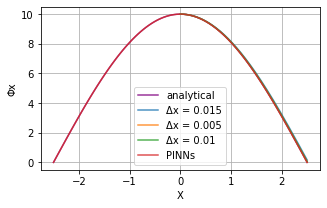

In [141]:
plt.figure(figsize=(5,3))
x_analytical =np.linspace(-a/2, a / 2, 100)
plt.plot(x_analytical, phi_x_analytical, c ="purple", alpha=0.8, label="analytical")
plt.plot(x1, phi_1[:166],  alpha=0.8, label="Δx = 0.015")
plt.plot(x2, phi_2[:500],  alpha=0.8, label="Δx = 0.005")
plt.plot(x3, phi_3[:250],  alpha=0.8, label="Δx = 0.01")
plt.plot(x_test,p_test,  alpha=0.8, label="PINNs")
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φx")
plt.legend()
plt.show()